Import necssary libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

Load the dataset

In [113]:
df = pd.read_csv("/content/Month_Value_1.csv")
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


info() gives the Information about the dataset

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   64 non-null     float64
 2   Sales_quantity                            64 non-null     float64
 3   Average_cost                              64 non-null     float64
 4   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


describe() gives the statistical calculations about the data

In [115]:
df.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


checking for null values

In [116]:
df.isnull().sum()

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

32 values found in the dataset and filling those values using fillna method

In [117]:
df.Revenue.fillna(method='ffill',inplace=True)

In [118]:
df.Sales_quantity.fillna(method='ffill',inplace=True)

In [119]:
df.Average_cost.fillna(method='ffill',inplace=True)

In [120]:
df.The_average_annual_payroll_of_the_region.fillna(method='ffill',inplace=True)

Filled the missing values using fillna method and checking null values again

In [121]:
df.isnull().sum()

Period                                      0
Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64

Converting the 'Period' column to a datetime data type.

In [123]:
df['Period'] = pd.to_datetime(df['Period'], format='%d.%m.%Y')

Set the 'Period' column as the index of the DataFrame

In [124]:
df.set_index('Period', inplace=True)

Checking the stationarity of a time series dataset using the Augmented Dickey-Fuller (ADF) test and also plotting the rolling statistics.

ADF Test Results for Revenue:
ADF Statistic: -1.706854986758204
p-value: 0.4275840874243606
Lags Used: 12
Number of Observations: 83
Critical Values:
   1%: -3.5117123057187376
   5%: -2.8970475206326833
   10%: -2.5857126912469153


ADF Test Results for Sales_quantity:
ADF Statistic: -1.4541339047979949
p-value: 0.5560664745618259
Lags Used: 11
Number of Observations: 84
Critical Values:
   1%: -3.510711795769895
   5%: -2.8966159448223734
   10%: -2.5854823866213152


ADF Test Results for Average_cost:
ADF Statistic: -6.032816263524468
p-value: 1.4047357654477661e-07
Lags Used: 0
Number of Observations: 95
Critical Values:
   1%: -3.5011373281819504
   5%: -2.8924800524857854
   10%: -2.5832749307479226


ADF Test Results for The_average_annual_payroll_of_the_region:
ADF Statistic: -2.016485905788383
p-value: 0.27939171170326293
Lags Used: 0
Number of Observations: 95
Critical Values:
   1%: -3.5011373281819504
   5%: -2.8924800524857854
   10%: -2.5832749307479226




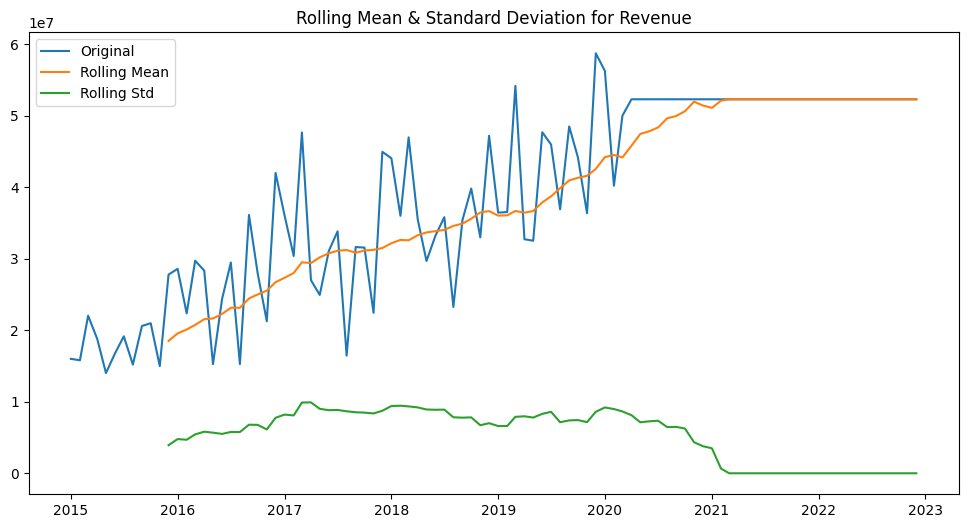

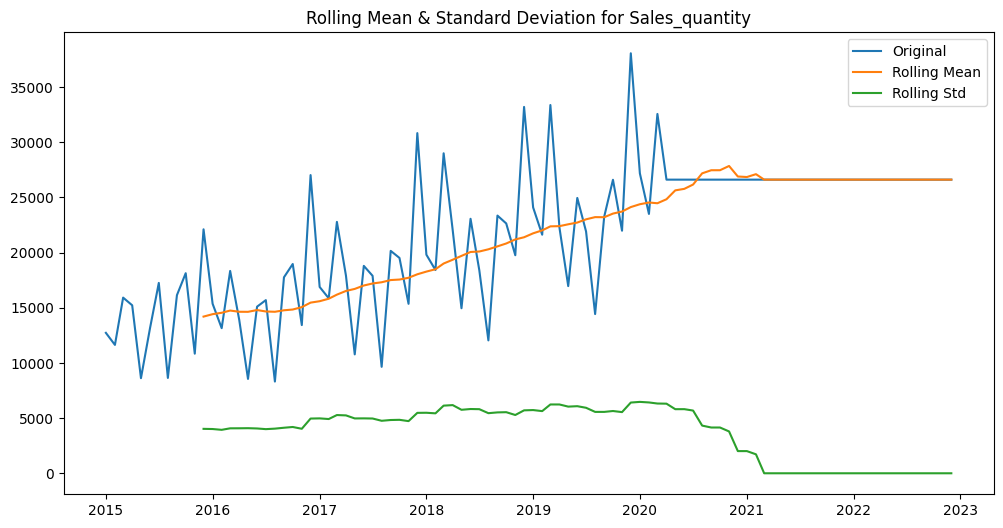

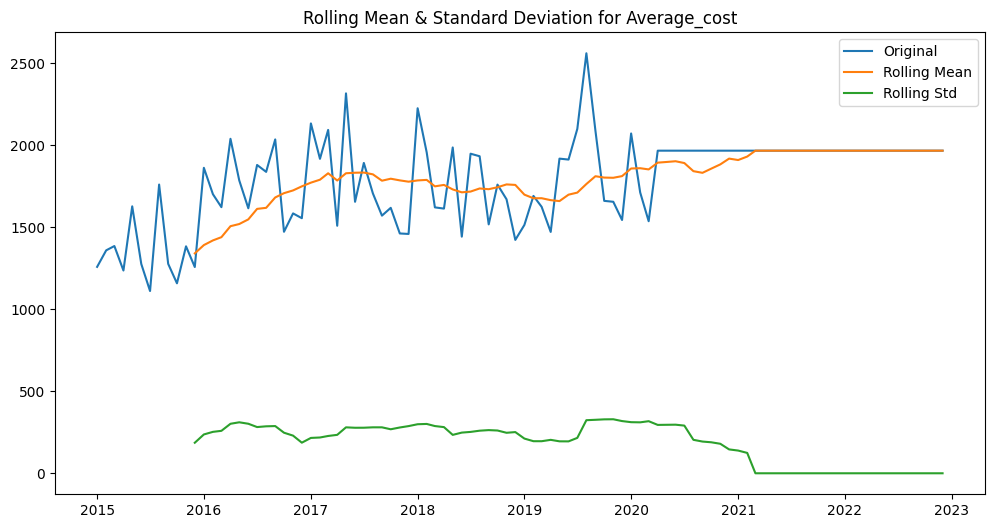

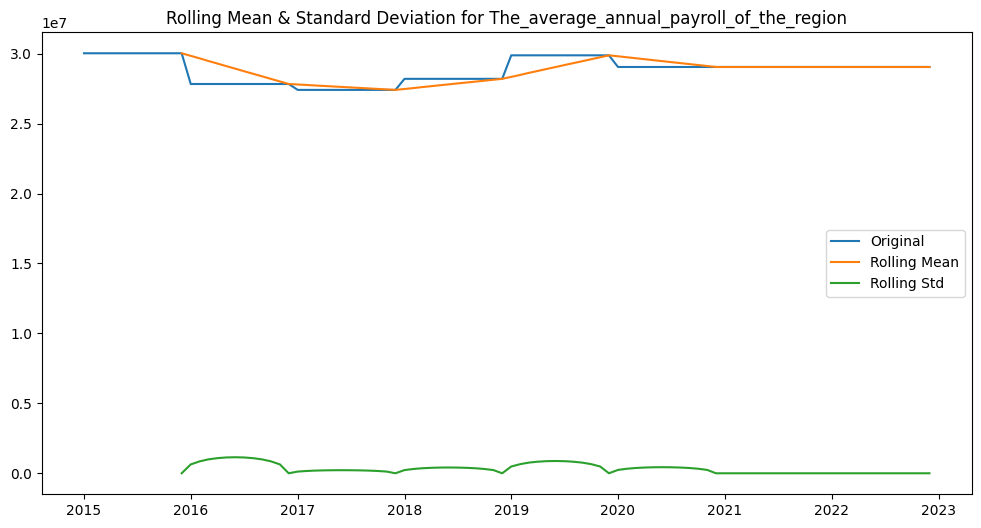

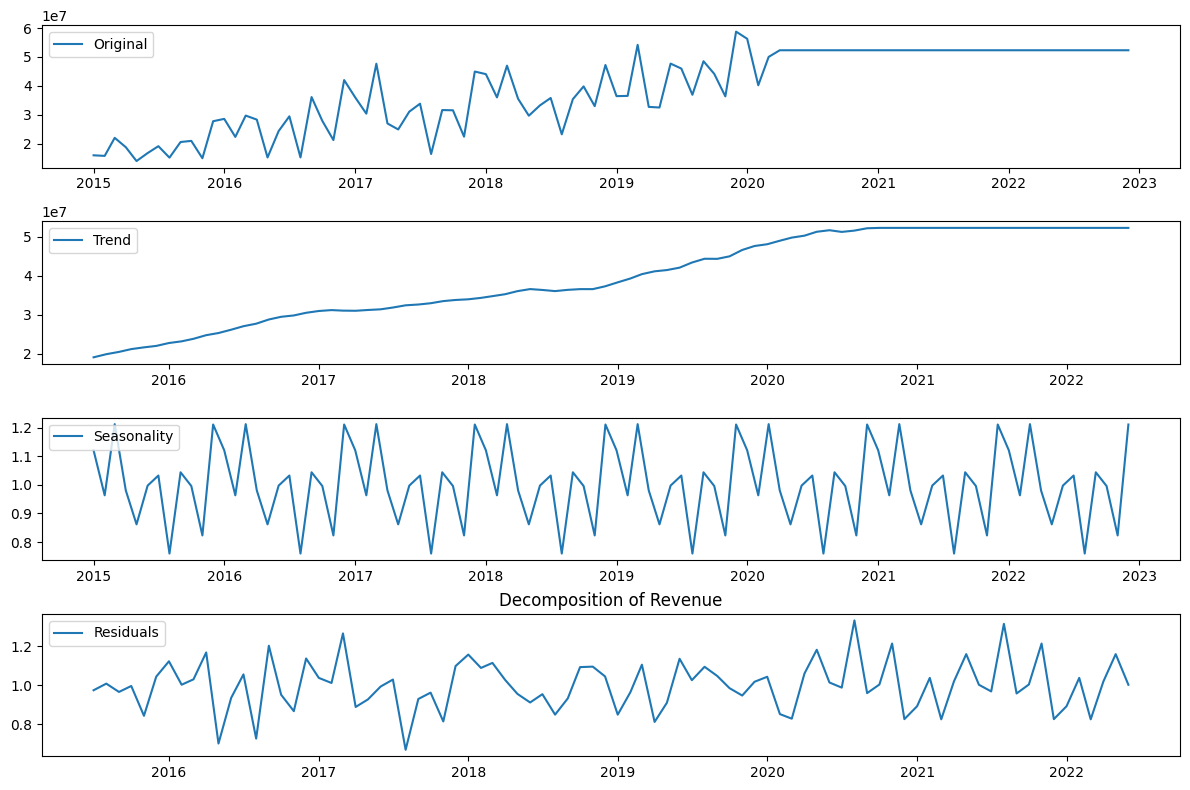

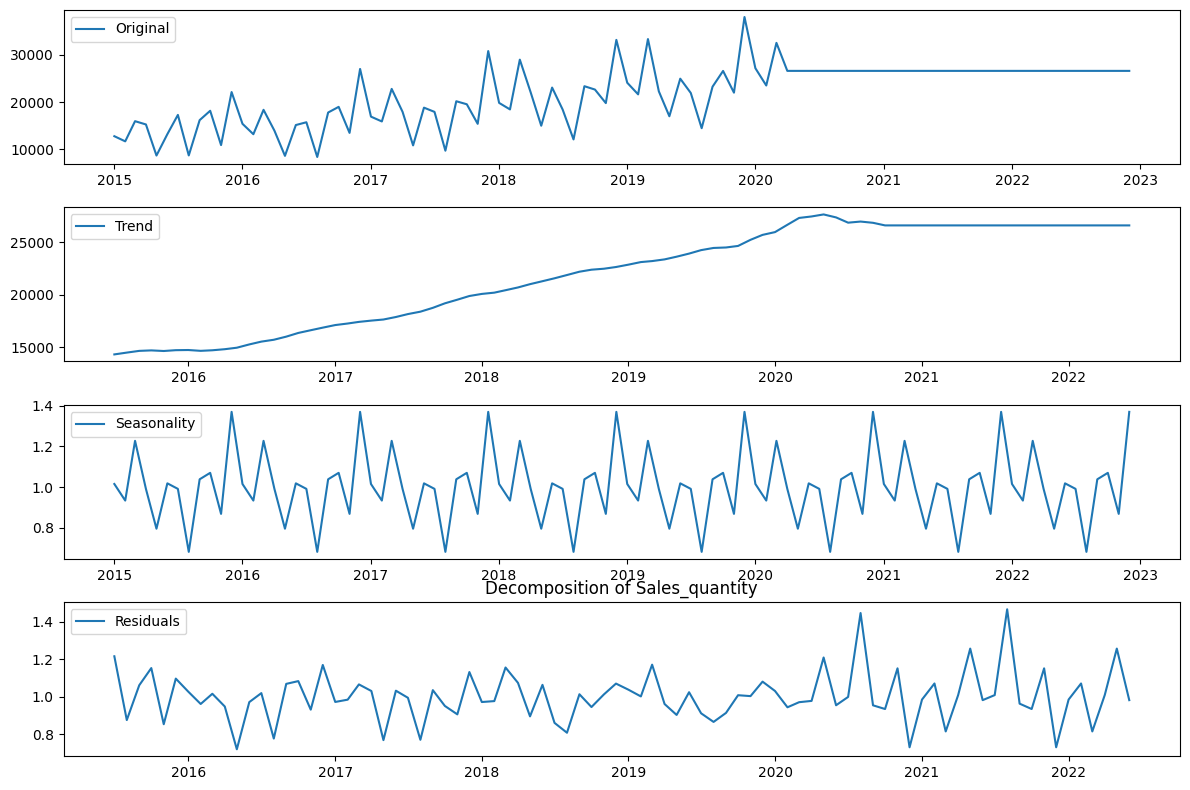

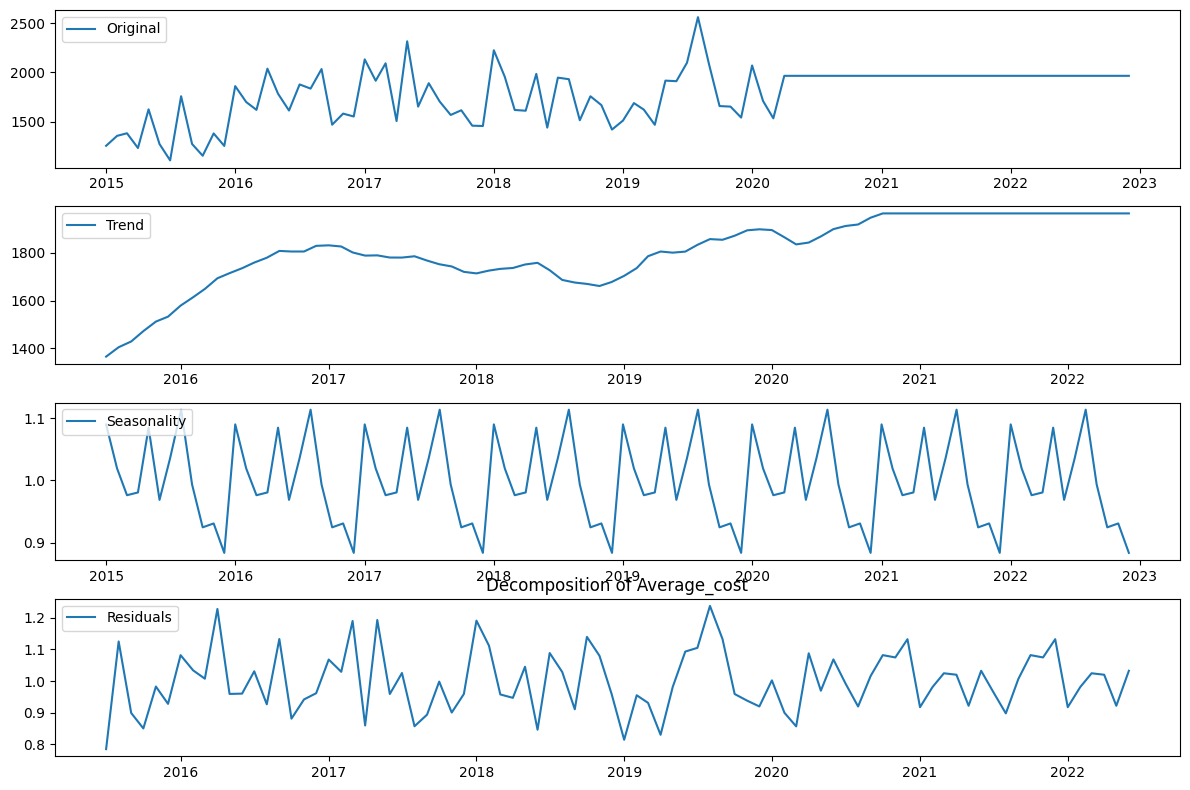

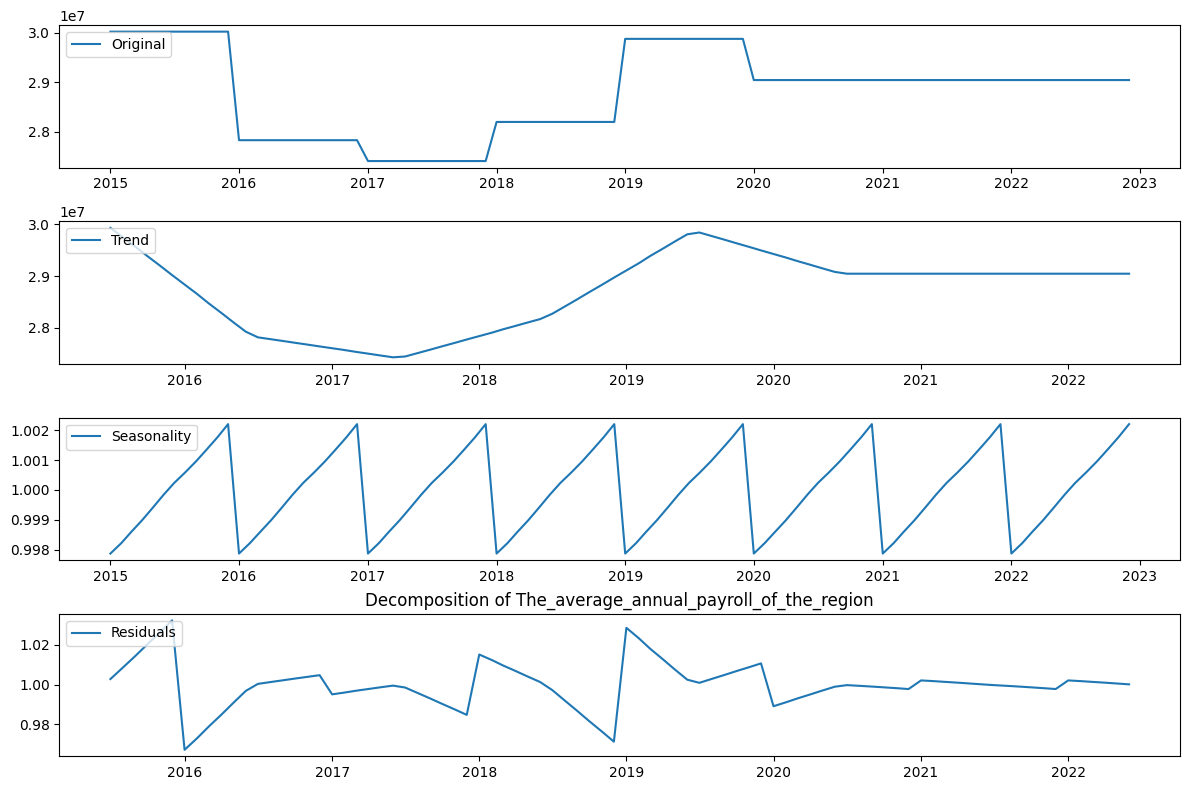

In [125]:

from statsmodels.tsa.stattools import adfuller


# Handle missing and infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
#df.dropna(inplace=True)

# ADF Test
def adf_test(timeseries, column_name):
    result = adfuller(timeseries, autolag='AIC')
    print(f"ADF Test Results for {column_name}:")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Lags Used: {result[2]}')
    print(f'Number of Observations: {result[3]}')
    print("Critical Values:")
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    print("\n")

# Iterate over each column and perform ADF test
for column in df.columns:
    adf_test(df[column], column)

# Plot rolling statistics
def plot_rolling_statistics(timeseries, column_name, window=12):
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolmean, label='Rolling Mean')
    plt.plot(rolstd, label='Rolling Std')
    plt.legend()
    plt.title(f'Rolling Mean & Standard Deviation for {column_name}')
    plt.show()

# Plot rolling statistics for each column
for column in df.columns:
    plot_rolling_statistics(df[column], column)

# Decompose time series for each column
from statsmodels.tsa.seasonal import seasonal_decompose

for column in df.columns:
    decomposition = seasonal_decompose(df[column], model='multiplicative')
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    plt.figure(figsize=(12, 8))
    plt.subplot(411)
    plt.plot(df[column], label='Original')
    plt.legend(loc='upper left')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='upper left')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='upper left')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.title(f'Decomposition of {column}')
    plt.show()


This code will perform the ADF test for each column in your dataset and print out whether each column is stationary or not based on the p-value. If the p-value is less than or equal to 0.05, the column is considered stationary; otherwise, it is not stationary.

The p-value of Columns Revenue, Sales_quantity, Average_cost is greater than 0.05 so not stationary.


It looks like differencing has made the columns 'Revenue', 'Sales_quantity', and 'Average_cost' stationary, as their p-values are now less than 0.05. However, the column 'The_average_annual_payroll_of_the_region' still have a p-value above 0.05.

To make 'The_average_annual_payroll_of_the_region' stationary, you can try higher-order differencing or other transformations. Let's apply second-order differencing to this column and perform the ADF test again:

Making 'Revenue' stationary:
ADF Test Results for 'Revenue':
ADF Statistic: -3.463442609195544
p-value: 0.008977127095540063
Lags Used: 11
Number of Observations: 83
Critical Values:
   1%: -3.5117123057187376
   5%: -2.8970475206326833
   10%: -2.5857126912469153
Stationary (p-value <= 0.05)


Making 'Sales_quantity' stationary:
ADF Test Results for 'Sales_quantity':
ADF Statistic: -6.686657134333798
p-value: 4.209427858982788e-09
Lags Used: 10
Number of Observations: 84
Critical Values:
   1%: -3.510711795769895
   5%: -2.8966159448223734
   10%: -2.5854823866213152
Stationary (p-value <= 0.05)


Making 'Average_cost' stationary:
ADF Test Results for 'Average_cost':
ADF Statistic: -5.470883182671904
p-value: 2.4002331207607285e-06
Lags Used: 10
Number of Observations: 84
Critical Values:
   1%: -3.510711795769895
   5%: -2.8966159448223734
   10%: -2.5854823866213152
Stationary (p-value <= 0.05)


Making 'The_average_annual_payroll_of_the_region' stationary:
ADF Test Results for 'The

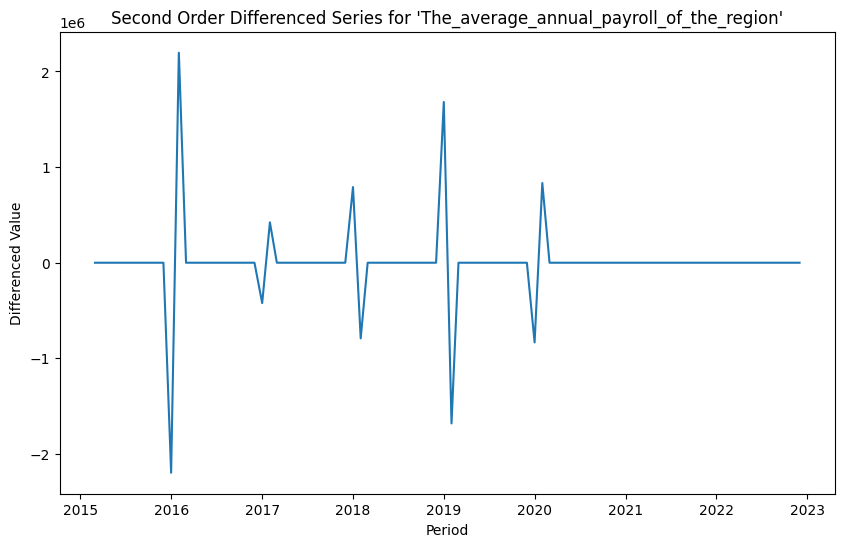

In [126]:

from statsmodels.tsa.stattools import adfuller


# Function to perform ADF test and print results
def adf_test(timeseries, column_name):
    result = adfuller(timeseries, autolag='AIC')
    print(f"ADF Test Results for '{column_name}':")
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Lags Used: {result[2]}')
    print(f'Number of Observations: {result[3]}')
    print("Critical Values:")
    for key, value in result[4].items():
        print(f'   {key}: {value}')
    if result[1] <= 0.05:
        print("Stationary (p-value <= 0.05)")
    else:
        print("Not Stationary (p-value > 0.05)")

# Apply differencing and check stationarity for each column
for column in ['Revenue', 'Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region']:
    print(f"Making '{column}' stationary:")
    differenced_series = df[column].diff().dropna()  # Apply differencing and remove NaNs
    adf_test(differenced_series, column)
    print("\n")

# Apply second-order differencing to 'The_average_annual_payroll_of_the_region'
second_differenced_series = df['The_average_annual_payroll_of_the_region'].diff().diff().dropna()

# Perform ADF test on the second-order differenced series
adf_test(second_differenced_series, 'The_average_annual_payroll_of_the_region (Second Order)')

# Plot the second-order differenced series
plt.figure(figsize=(10, 6))
plt.plot(second_differenced_series)
plt.title("Second Order Differenced Series for 'The_average_annual_payroll_of_the_region'")
plt.xlabel("Period")
plt.ylabel("Differenced Value")
plt.show()

performing time series forecasting using the SARIMA (Seasonal Autoregressive Integrated Moving Average) model for the given dataset.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


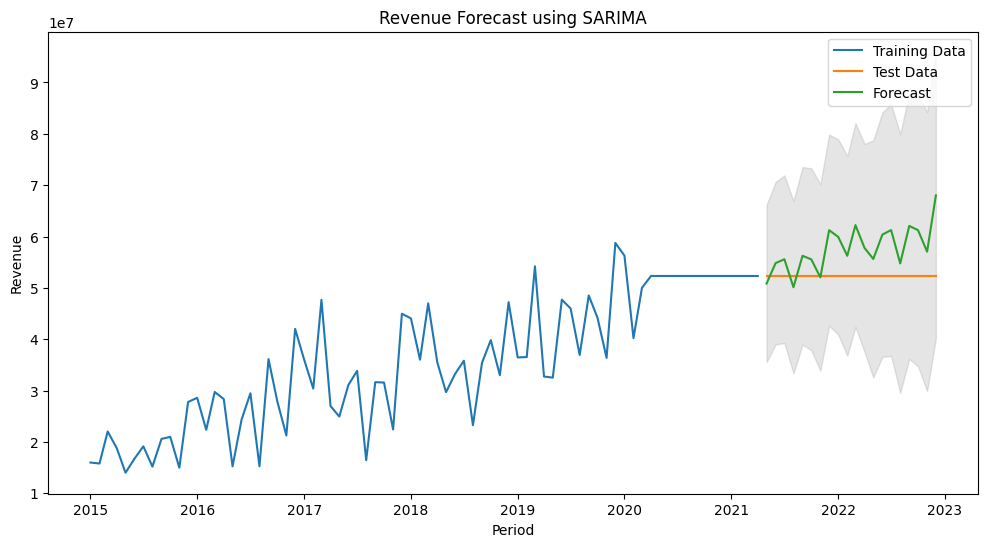

In [42]:

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Choose the column for forecasting (e.g., 'Revenue')
column_name = 'Revenue'

# Train-test split
train_size = int(0.8 * len(df))
train_data = df[column_name][:train_size]
test_data = df[column_name][train_size:]

'''# Plot ACF and PACF to determine ARIMA parameters
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(train_data, lags=40, ax=plt.gca())
plt.subplot(212)
plot_pacf(train_data, lags=40, ax=plt.gca())
plt.tight_layout()
plt.show()'''

# Determine SARIMA parameters (p, d, q) x (P, D, Q, s)
# You may need to adjust these parameters based on the ACF and PACF plots
p = 1
d = 1
q = 1
P = 1
D = 1
Q = 1
s = 12  # Assuming a seasonal period of 12 months

# Fit SARIMA model
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Forecasting
forecast_steps = len(test_data)
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
confidence_interval = forecast.conf_int()

# Plot the actual vs. forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.fill_between(confidence_interval.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='gray', alpha=0.2)
plt.title(f'{column_name} Forecast using SARIMA')
plt.xlabel('Period')
plt.ylabel(column_name)
plt.legend()
plt.show()


1. **Financial Analysis**: Analyze revenue trends, cost trends, and profitability over different periods.

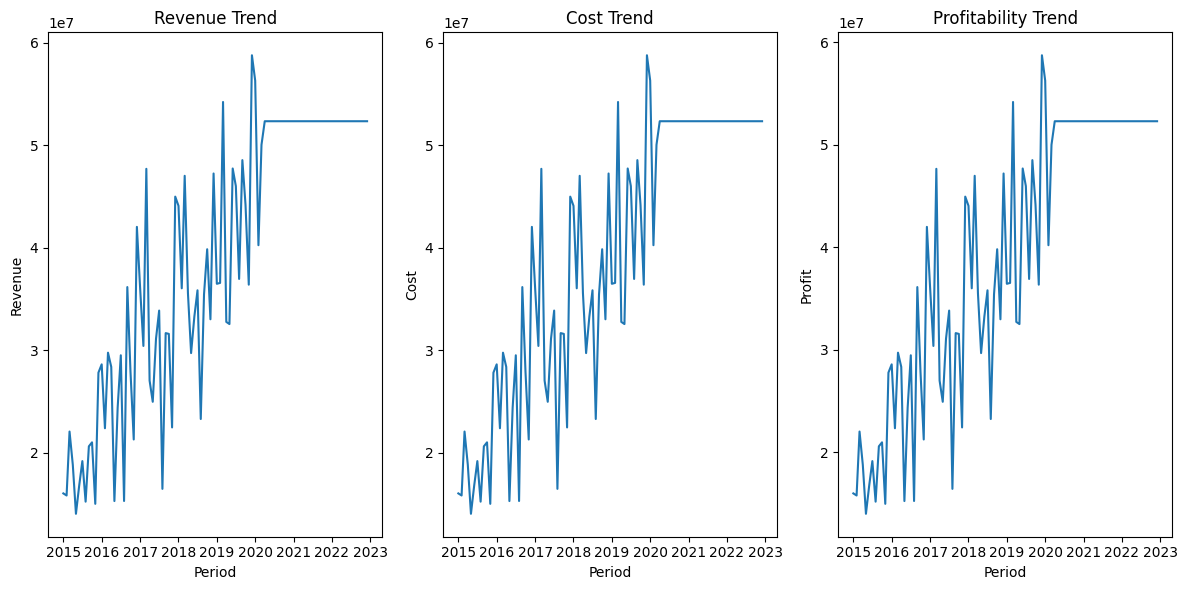

In [43]:
# Calculate additional columns: Profit and Cost
df['Profit'] = df['Revenue'] - df['Average_cost']
df['Cost'] = df['Sales_quantity'] * df['Average_cost']


# Plotting the trends
plt.figure(figsize=(12, 6))

# Revenue trend
plt.subplot(1, 3, 1)
sns.lineplot(data=df, x=df.index, y='Revenue')
plt.title('Revenue Trend')

# Cost trend
plt.subplot(1, 3, 2)
sns.lineplot(data=df, x=df.index, y='Cost')
plt.title('Cost Trend')

# Profitability trend
plt.subplot(1, 3, 3)
sns.lineplot(data=df, x=df.index, y='Profit')
plt.title('Profitability Trend')

plt.tight_layout()
plt.show()

2. **Sales Quantity Analysis**: Explore the relationship between sales quantity and revenue.

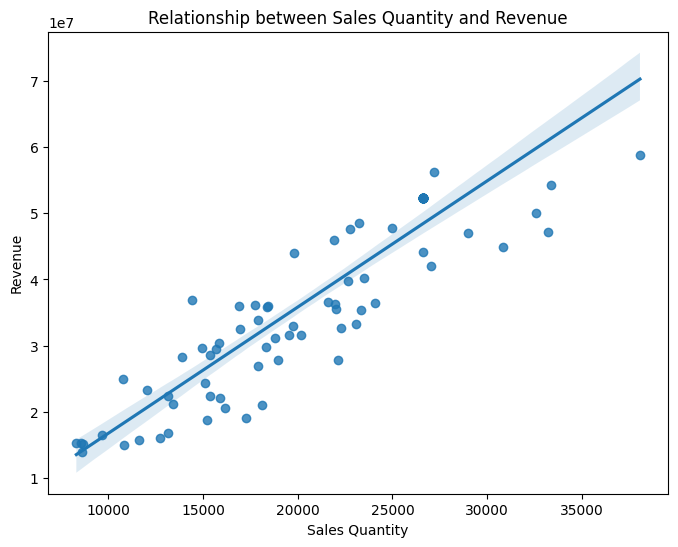

In [44]:
#scatterplot using seaborn
plt.figure(figsize=(8, 6))
sns.regplot(x='Sales_quantity', y='Revenue', data=df)
plt.title('Relationship between Sales Quantity and Revenue')
plt.xlabel('Sales Quantity')
plt.ylabel('Revenue')
plt.show()

This will show you not only the scatter plot but also a regression line that provides an estimate of the linear relationship between sales quantity and revenue.

3. **Cost Management**: Investigate the cost structure and identify opportunities for cost optimization.

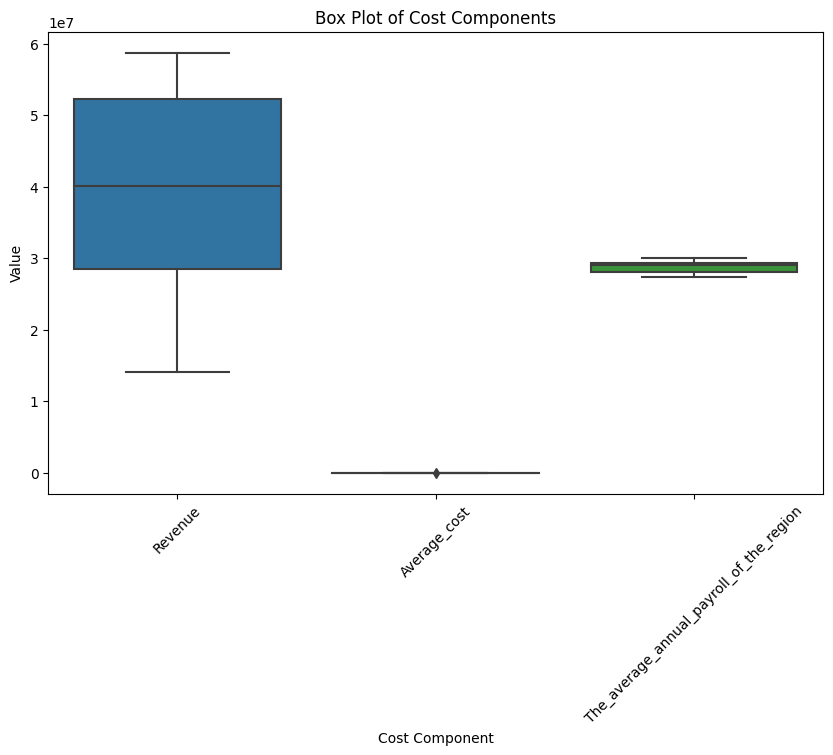

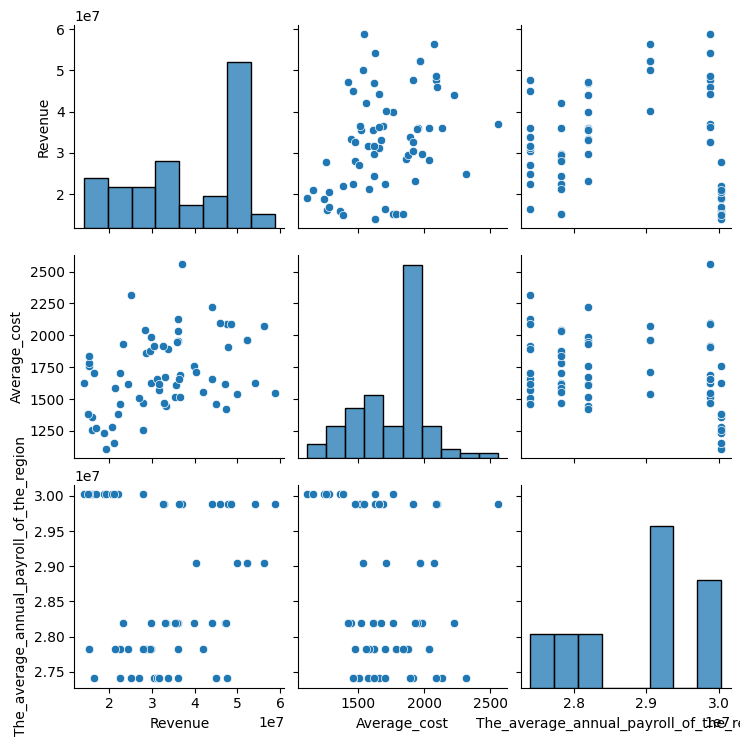

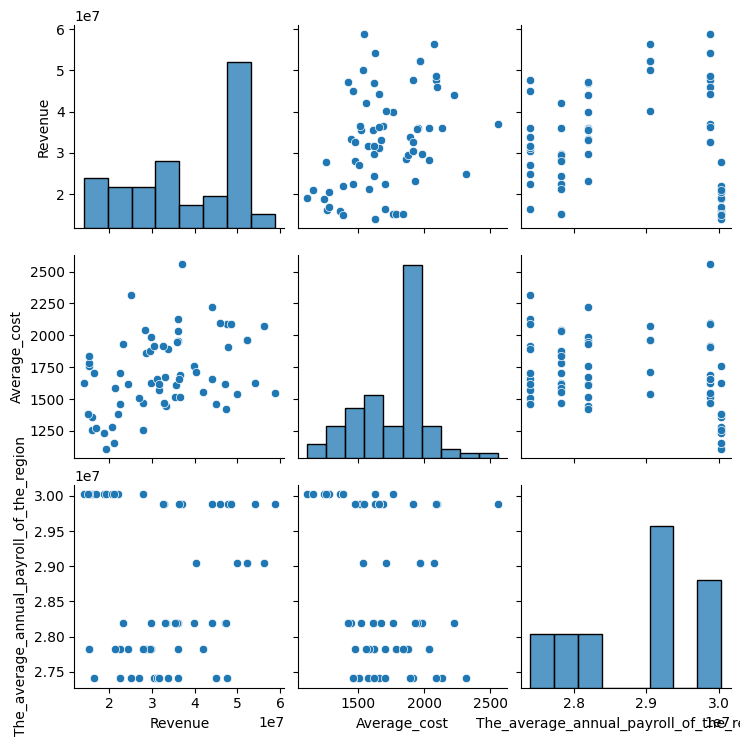

In [45]:
# Display summary statistics of cost-related columns
cost_columns = ['Revenue', 'Average_cost', 'The_average_annual_payroll_of_the_region']
cost_data = df[cost_columns]
# Box plot to visualize cost components
plt.figure(figsize=(10, 6))
sns.boxplot(data=cost_data)
plt.title("Box Plot of Cost Components")
plt.xlabel("Cost Component")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

# Pairplot to visualize relationships between cost components
sns.pairplot(cost_data)
plt.show()

# Pairplot to visualize relationships between cost components
sns.pairplot(cost_data)
plt.show()


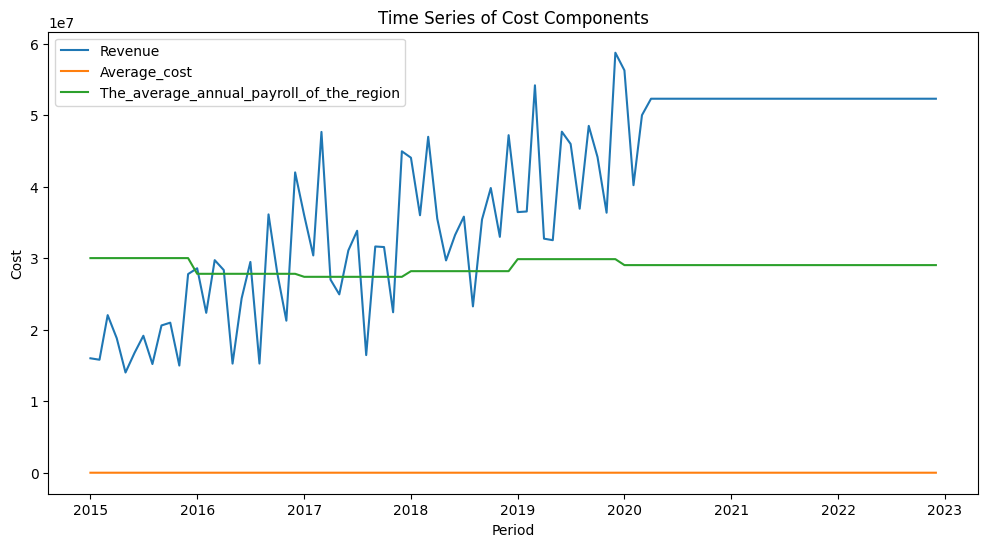

In [46]:
# Plot time series of cost components
plt.figure(figsize=(12, 6))
for column in cost_columns:
    plt.plot(df.index, df[column], label=column)
plt.title("Time Series of Cost Components")
plt.xlabel("Period")
plt.ylabel("Cost")
plt.legend()
plt.show()

            Revenue  Average_cost  The_average_annual_payroll_of_the_region
count  9.600000e+01     96.000000                              9.600000e+01
mean   3.901387e+07   1785.319036                              2.880889e+07
std    1.339186e+07    273.678362                              8.771246e+05
min    1.402148e+07   1110.576805                              2.740647e+07
25%    2.853894e+07   1605.548321                              2.810553e+07
50%    4.002840e+07   1916.717006                              2.904500e+07
75%    5.232069e+07   1965.834790                              2.925338e+07
max    5.875647e+07   2559.328184                              3.002468e+07


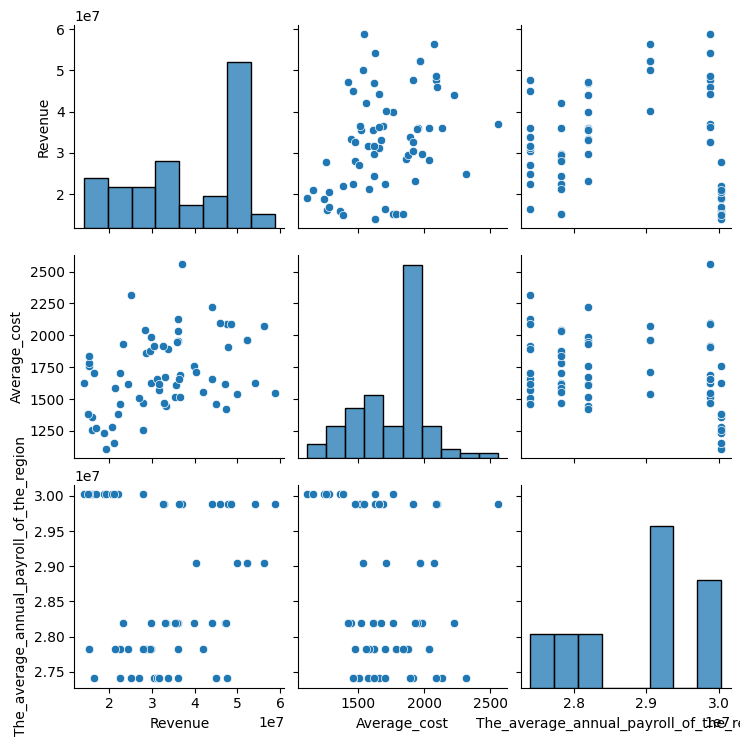

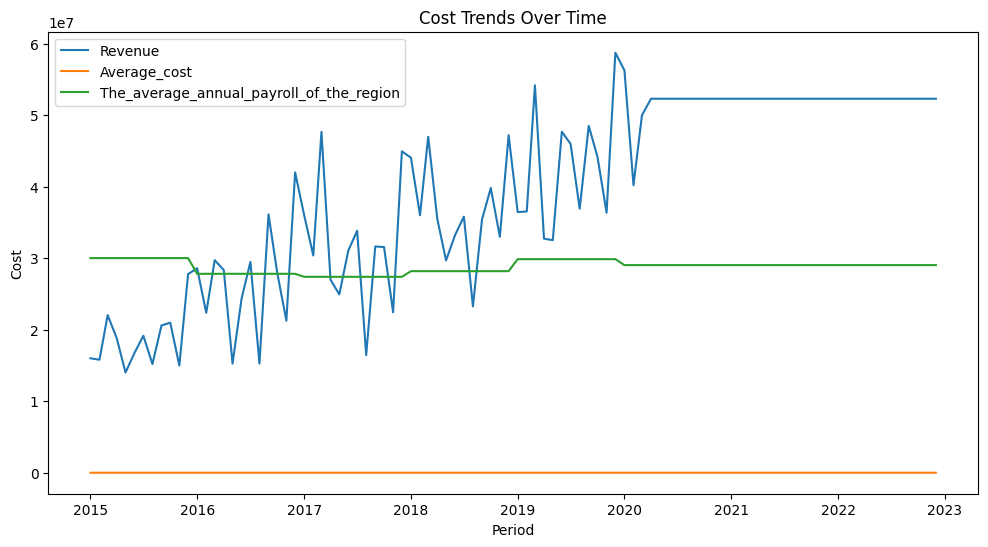

In [47]:


cost_columns = ['Revenue', 'Average_cost', 'The_average_annual_payroll_of_the_region']
cost_data = df[cost_columns]
print(cost_data.describe())

# Visualize cost relationships
sns.pairplot(cost_data)
plt.show()

plt.figure(figsize=(12, 6))
for column in cost_columns:
    plt.plot(df.index, df[column], label=column)
plt.title("Cost Trends Over Time")
plt.xlabel("Period")
plt.ylabel("Cost")
plt.legend()
plt.show()


4. **Payroll Analysis**: Study the impact of the average annual payroll on business operations and revenue.

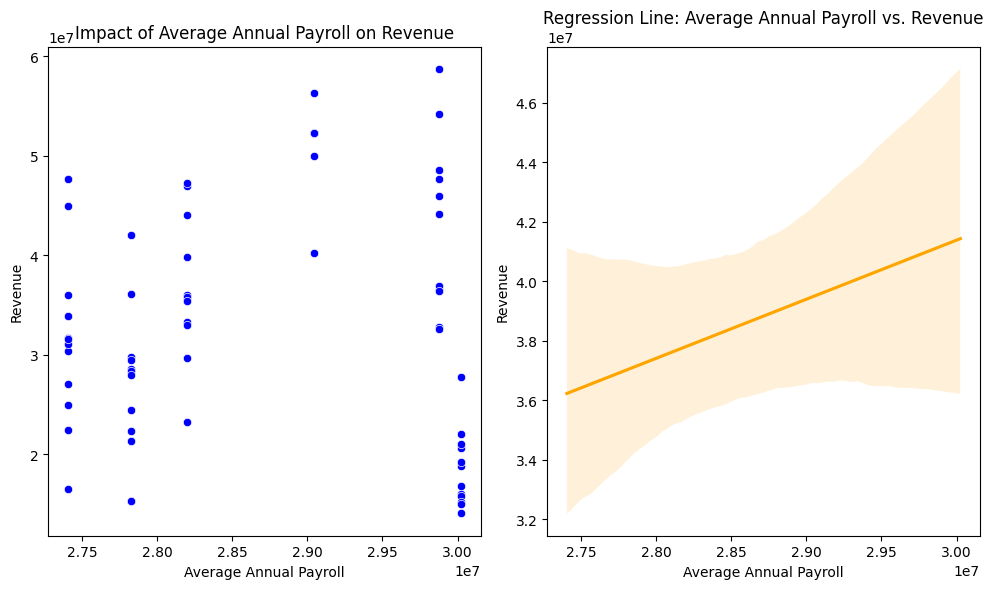

Correlation between Average Annual Payroll and Revenue: 0.13


In [48]:
# Plotting the impact of Average Annual Payroll on Revenue
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='The_average_annual_payroll_of_the_region', y='Revenue', color='blue')
plt.title('Impact of Average Annual Payroll on Revenue')
plt.xlabel('Average Annual Payroll')
plt.ylabel('Revenue')

plt.subplot(1, 2, 2)
sns.regplot(data=df, x='The_average_annual_payroll_of_the_region', y='Revenue', scatter=False, color='orange')
plt.title('Regression Line: Average Annual Payroll vs. Revenue')
plt.xlabel('Average Annual Payroll')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()

# Calculate the correlation between Average Annual Payroll and Revenue
correlation_payroll_revenue = df['The_average_annual_payroll_of_the_region'].corr(df['Revenue'])

print(f"Correlation between Average Annual Payroll and Revenue: {correlation_payroll_revenue:.2f}")


5. **Periodic Performance**: Analyze how revenue, sales quantity, and costs vary across different periods.

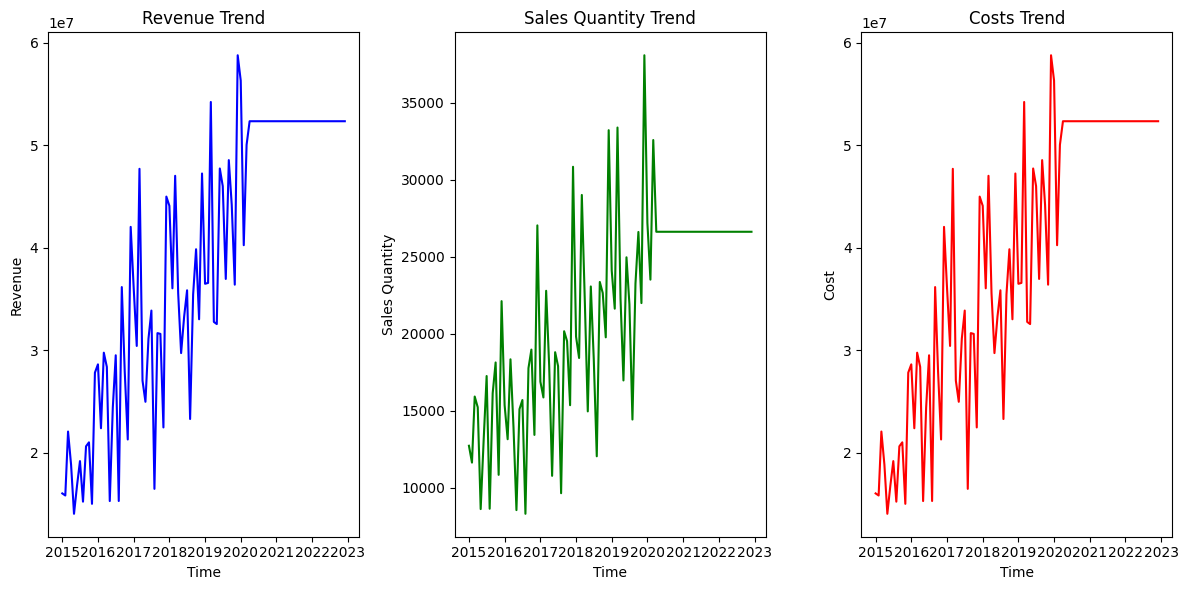

In [49]:
# Plotting revenue, sales quantity, and costs over time
plt.figure(figsize=(12, 6))

# Revenue trend
plt.subplot(1, 3, 1)
sns.lineplot(data=df, x=df.index, y='Revenue', color='blue')
plt.title('Revenue Trend')
plt.xlabel('Time')
plt.ylabel('Revenue')

# Sales Quantity trend
plt.subplot(1, 3, 2)
sns.lineplot(data=df, x=df.index, y='Sales_quantity', color='green')
plt.title('Sales Quantity Trend')
plt.xlabel('Time')
plt.ylabel('Sales Quantity')

# Costs trend
plt.subplot(1, 3, 3)
sns.lineplot(data=df, x=df.index, y='Cost', color='red')
plt.title('Costs Trend')
plt.xlabel('Time')
plt.ylabel('Cost')

plt.tight_layout()
plt.show()

6. **Profit Margin Analysis**: Calculate profit margins by comparing revenue and costs.

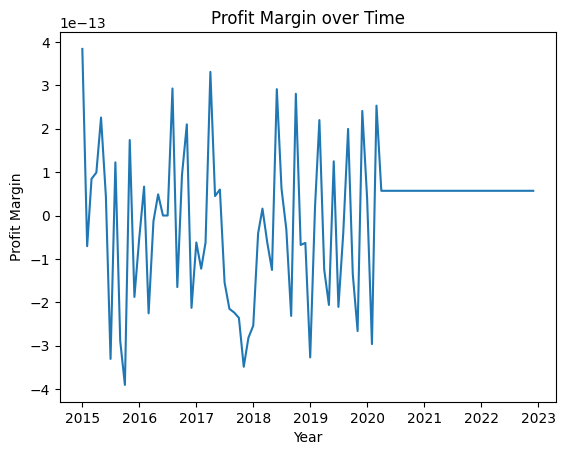

count    9.600000e+01
mean    -2.265761e-15
std      1.613497e-13
min     -3.904010e-13
25%     -8.366342e-14
50%      5.696087e-14
75%      5.696087e-14
max      3.839289e-13
Name: Profit_margin, dtype: float64


In [52]:
#Calculate the cost of goods sold (COGS):

df['COGS'] = df['Sales_quantity'] * df['Average_cost']
#Calculate the gross profit:
df['Gross_profit'] = df['Revenue'] - df['COGS']
#Calculate the profit margin:
df['Profit_margin'] = (df['Gross_profit'] / df['Revenue']) * 100

#Analyze the profit margins
plt.plot(df['Profit_margin'])
plt.title('Profit Margin over Time')
plt.xlabel('Year')
plt.ylabel('Profit Margin')
plt.show()

statistics = df['Profit_margin'].describe()
print(statistics)

7. **Operational Efficiency**: Explore the relationship between costs, payroll, and business efficiency.

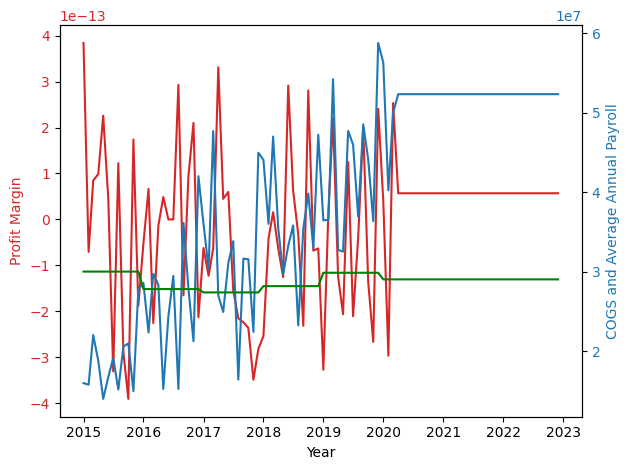

In [54]:
#Calculate the cost of goods sold (COGS):

df['COGS'] = df['Sales_quantity'] * df['Average_cost']
#Calculate the gross profit:
df['Gross_profit'] = df['Revenue'] - df['COGS']
#Calculate the profit margin:
df['Profit_margin'] = (df['Gross_profit'] / df['Revenue']) * 100


fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Profit Margin', color=color)
ax1.plot(df['Profit_margin'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('COGS and Average Annual Payroll', color=color)
ax2.plot(df['COGS'], label='COGS', color=color)
ax2.plot(df['The_average_annual_payroll_of_the_region'], label='Average Annual Payroll', color='green')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [55]:
correlation_coefficient_1 = df['Profit_margin'].corr(df['COGS'])
correlation_coefficient_2 = df['Profit_margin'].corr(df['The_average_annual_payroll_of_the_region'])
correlation_coefficient_3 = df['COGS'].corr(df['The_average_annual_payroll_of_the_region'])
print('Correlation Coefficient between Profit Margin and COGS:', correlation_coefficient_1)
print('Correlation Coefficient between Profit Margin and Average Annual Payroll:', correlation_coefficient_2)
print('Correlation Coefficient between COGS and Average Annual Payroll:', correlation_coefficient_3)

Correlation Coefficient between Profit Margin and COGS: 0.1692831286159818
Correlation Coefficient between Profit Margin and Average Annual Payroll: 0.1203460641835033
Correlation Coefficient between COGS and Average Annual Payroll: 0.130206885831923


8. **Time Series Analysis**: Examine trends and seasonality in revenue, sales, and costs.

To examine trends and seasonality in revenue, sales, and costs, you can use time series decomposition and visualization techniques. These are the steps of decomposing the time series and creating relevant plots to analyze trends and seasonality using Python and pandas:

Decompose Time Series: Decompose the time series data into its components, including trend, seasonality, and residuals, using a decomposition method.

Visualize Components: Create line plots to visualize the trend, seasonality, and residuals separately.

Interpretation: Interpret the plots to analyze the trends and seasonality patterns in the data.


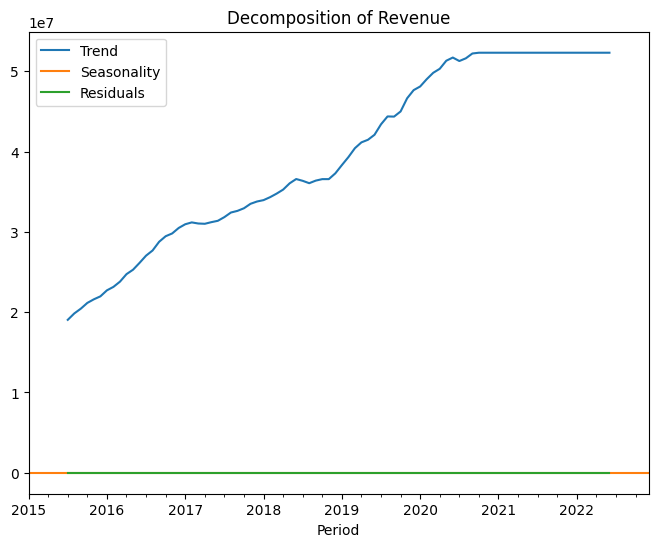

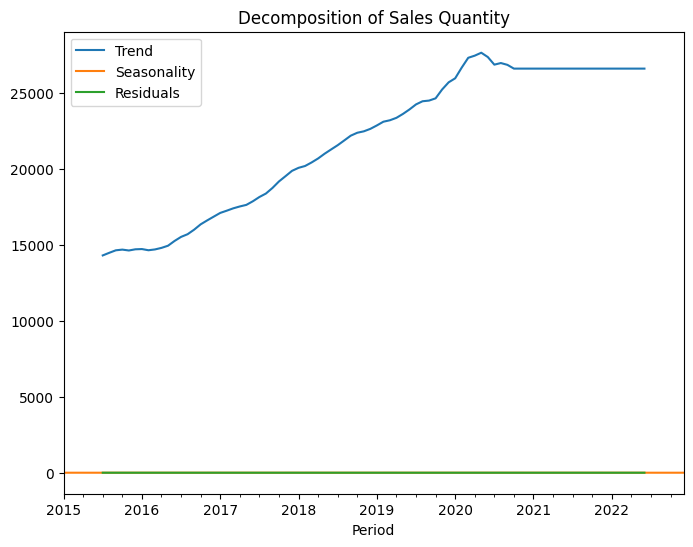

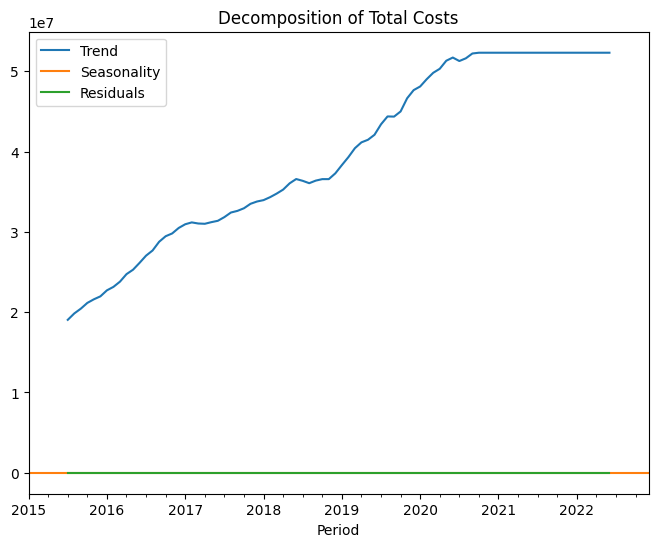

In [60]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series: Revenue
revenue_decomposition = seasonal_decompose(df['Revenue'], model='multiplicative')

# Decompose time series: Sales quantity
sales_decomposition = seasonal_decompose(df['Sales_quantity'], model='multiplicative')

# Decompose time series: Total costs
total_costs_decomposition = seasonal_decompose(df['Average_cost'] * df['Sales_quantity'], model='multiplicative')

# Plot the decomposed components for Revenue
plt.figure(figsize=(8,6))
revenue_decomposition.trend.plot(label='Trend')
revenue_decomposition.seasonal.plot(label='Seasonality')
revenue_decomposition.resid.plot(label='Residuals')
plt.title('Decomposition of Revenue')
plt.legend()
plt.show()

# Plot the decomposed components for Sales quantity
plt.figure(figsize=(8,6))
sales_decomposition.trend.plot(label='Trend')
sales_decomposition.seasonal.plot(label='Seasonality')
sales_decomposition.resid.plot(label='Residuals')
plt.title('Decomposition of Sales Quantity')
plt.legend()
plt.show()

# Plot the decomposed components for Total costs
plt.figure(figsize=(8,6))
total_costs_decomposition.trend.plot(label='Trend')
total_costs_decomposition.seasonal.plot(label='Seasonality')
total_costs_decomposition.resid.plot(label='Residuals')
plt.title('Decomposition of Total Costs')
plt.legend()
plt.show()


9. **Payroll Management**: Assess the proportion of revenue dedicated to payroll and its effect on profit.

To assess the proportion of revenue dedicated to payroll and its effect on profit

Calculate Payroll Proportion: Calculate the proportion of revenue dedicated to payroll by dividing the total payroll by the total revenue.

Analyze Payroll Proportion and Profit: Examine how the payroll proportion correlates with profit using correlation analysis and visualizations.

Visualize the Relationship: Create scatter plots to visualize the relationship between the payroll proportion and profit.

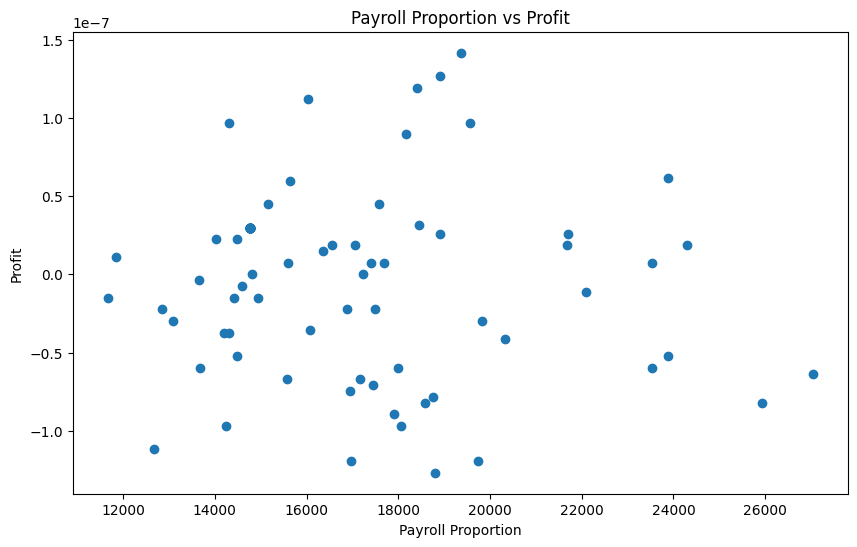

Correlation between Payroll Proportion and Profit: -0.15348060601537053


In [62]:
# Calculate total payroll
df['Total_payroll'] = df['The_average_annual_payroll_of_the_region'] * df['Sales_quantity']

# Calculate payroll proportion
df['Payroll_proportion'] = df['Total_payroll'] / df['Revenue']

# Calculate profit
df['Profit'] = df['Revenue'] - (df['Average_cost'] * df['Sales_quantity'])

# Calculate correlation between Payroll proportion and Profit
correlation = df['Payroll_proportion'].corr(df['Profit'])

# Scatter plot: Payroll Proportion vs Profit
plt.figure(figsize=(10, 6))
plt.scatter(df['Payroll_proportion'], df['Profit'])
plt.title('Payroll Proportion vs Profit')
plt.xlabel('Payroll Proportion')
plt.ylabel('Profit')
plt.show()

# Print correlation coefficient
print("Correlation between Payroll Proportion and Profit:", correlation)

The correlation coefficient measures the strength and direction of a linear relationship between two variables. In this case, a negative correlation coefficient suggests that there is a weak negative linear relationship between the Payroll Proportion and Profit.

10. **Data Visualization**: Visualize data using charts and graphs to communicate insights effectively.

Line Chart for Revenue and Costs Over Time:
Shows the trends in revenue and costs over time to observe their patterns and fluctuations.

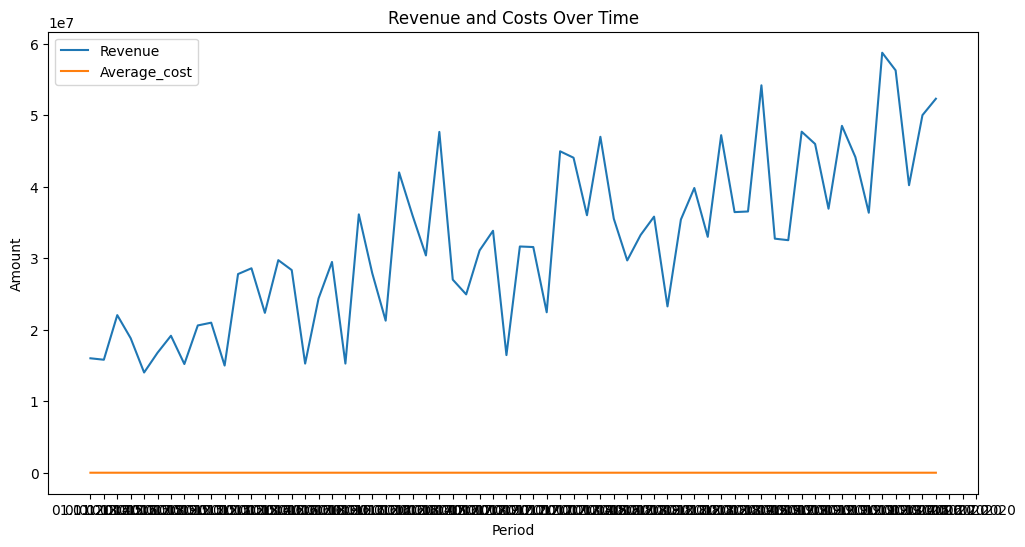

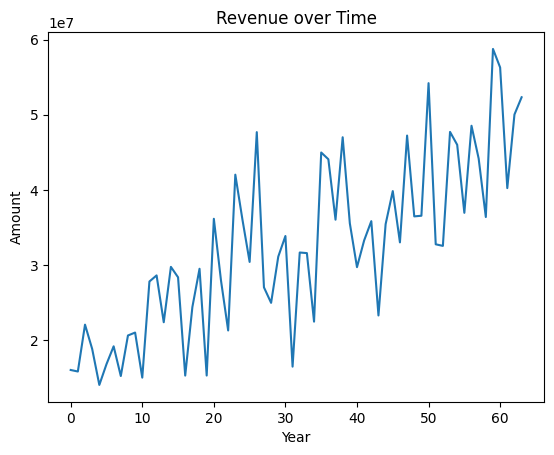

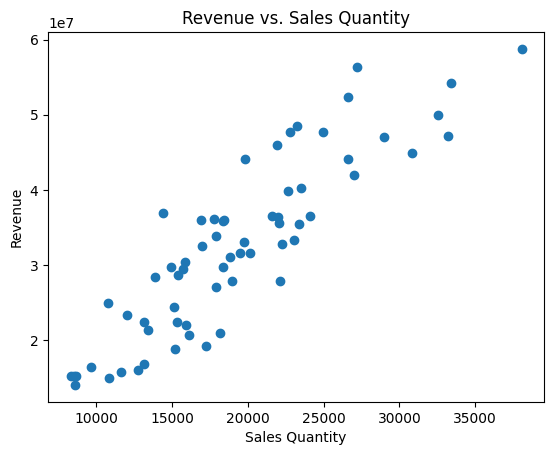

In [77]:
#Line Chart for Revenue and Costs Over Time:
plt.figure(figsize=(12, 6))
plt.plot(df['Period'], df['Revenue'], label='Revenue')
plt.plot(df['Period'], df['Average_cost'], label='Average_cost')
plt.xlabel('Period')
plt.ylabel('Amount')
plt.title('Revenue and Costs Over Time')
plt.legend()
plt.show()

#Creating a line chart to visualize the revenue over time:
plt.plot(df['Revenue'])
plt.title('Revenue over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

#Scatter plot of revenue and sales quantity:
plt.scatter(df['Sales_quantity'], df['Revenue'])
plt.title('Revenue vs. Sales Quantity')
plt.xlabel('Sales Quantity')
plt.ylabel('Revenue')
plt.show()

Line chart Show the trends in revenue and costs over time to observe their patterns and fluctuations.

Bar Chart Display the sales quantity for each period using a bar chart to visualize how sales vary.

Box plot to show the distribution of profit and identify potential outliers.

Scatter Plot for Profit vs Payroll Proportion:
Visualize the relationship between profit and payroll proportion using a scatter plot.

Heatmap for Correlation Matrix:
Display a heatmap of the correlation matrix to visualize relationships between multiple variables.


Line Chart for Business Efficiency:
Visualize the calculated business efficiency over time.

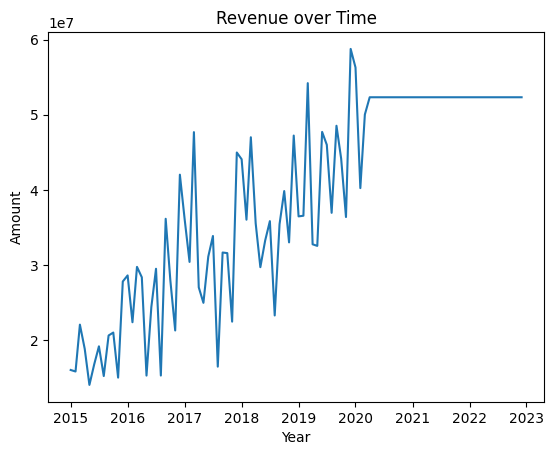

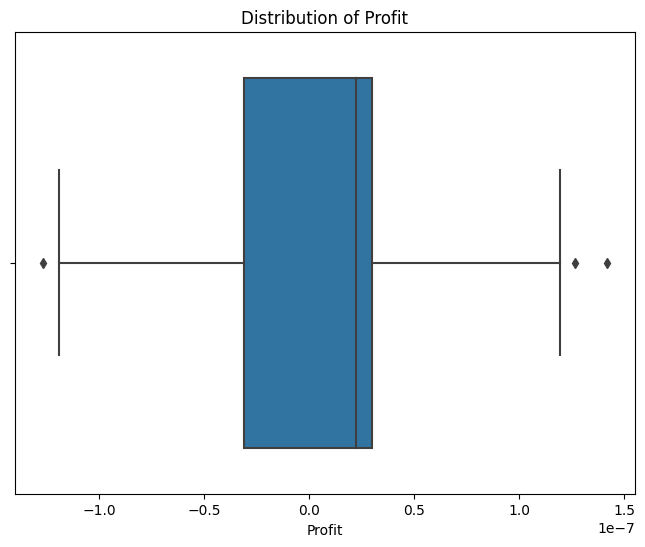

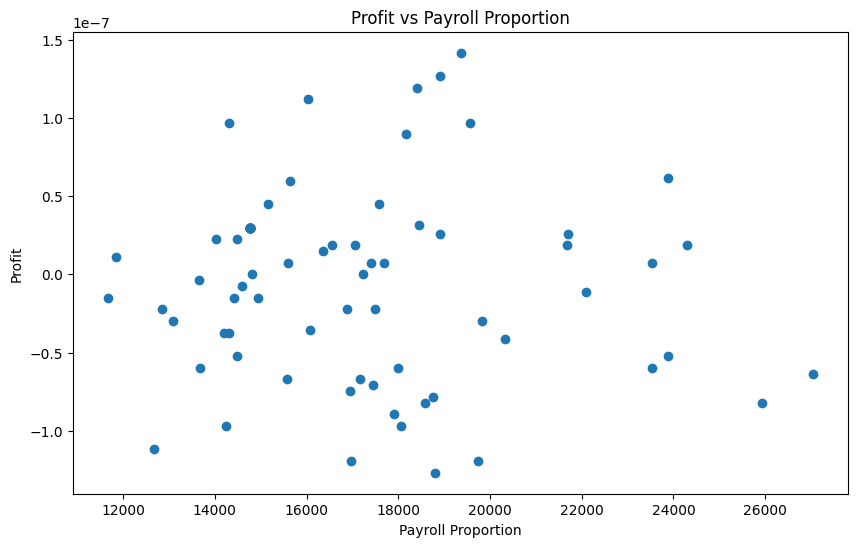

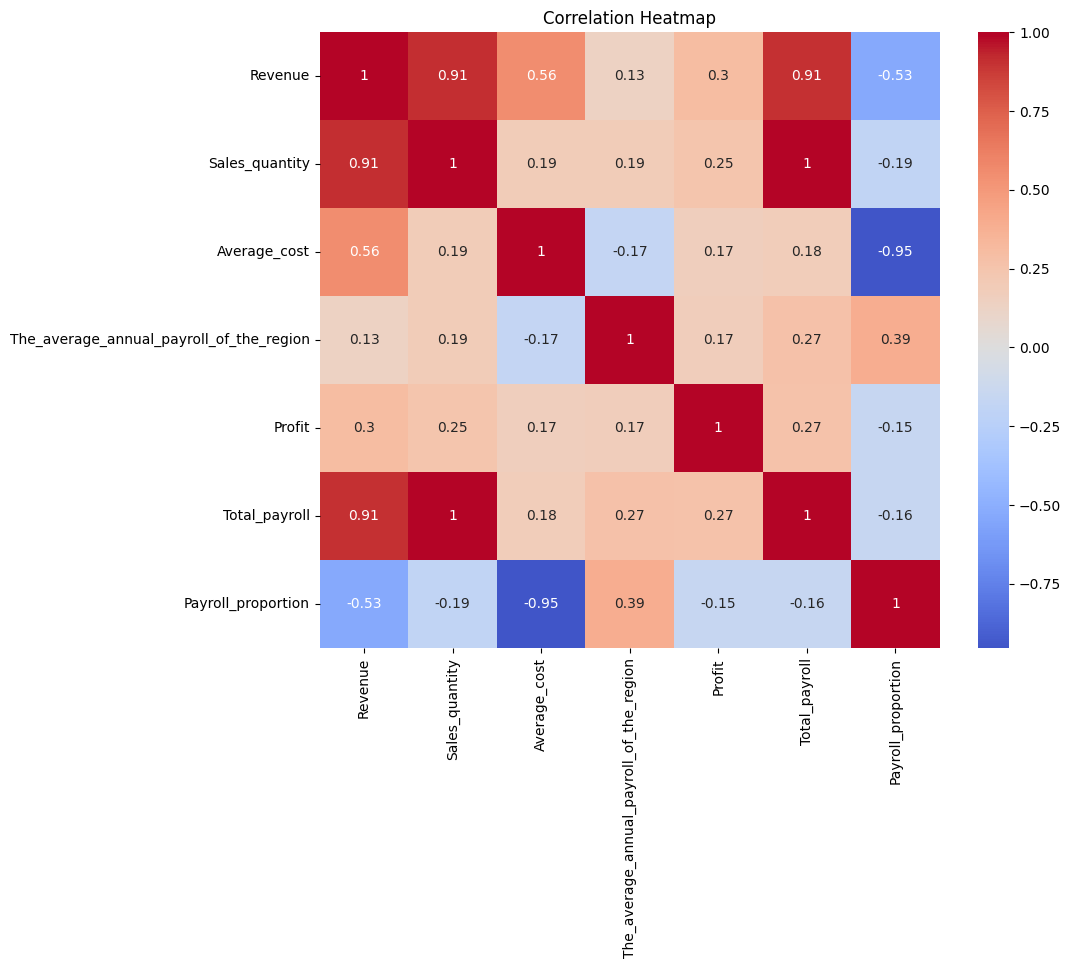

In [133]:
# Calculate total payroll
df['Total_payroll'] = df['The_average_annual_payroll_of_the_region'] * df['Sales_quantity']

# Calculate payroll proportion
df['Payroll_proportion'] = df['Total_payroll'] / df['Revenue']

# Calculate profit
df['Profit'] = df['Revenue'] - (df['Average_cost'] * df['Sales_quantity'])

#Creating a line chart to visualize the revenue over time:
plt.plot(df['Revenue'])
plt.title('Revenue over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

#Box Plot for Profit Distribution:

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Profit')
plt.xlabel('Profit')
plt.title('Distribution of Profit')
plt.show()

#Scatter Plot for Profit vs Payroll Proportion:


plt.figure(figsize=(10, 6))
plt.scatter(df['Payroll_proportion'], df['Profit'])
plt.xlabel('Payroll Proportion')
plt.ylabel('Profit')
plt.title('Profit vs Payroll Proportion')
plt.show()

#Heatmap for Correlation Matrix:

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()



Project Summary:

The dataset contains information about business metrics over different periods.

Columns:

Period: Time period of data collection.
Revenue: Total revenue generated during the period.
Sales Quantity: Total quantity of products sold during the period.
Average Cost: Average cost of products.
The Average Annual Payroll of the Region: The average annual payroll for the region.
Key Insights:

The dataset covers a range of time periods.
Revenue varies over time, indicating potential business fluctuations.
Sales Quantity shows how many products were sold in each period.
Average Cost provides information about the cost of products.
The Average Annual Payroll of the Region represents the payroll expenses.
Derived Insights:

Total Costs: Calculated by multiplying Sales Quantity and Average Cost.
Profit: Calculated as Revenue minus Total Costs.
Payroll Proportion: Represents the proportion of Revenue dedicated to payroll expenses.
